In [245]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from statsmodels.tsa.seasonal import STL
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [334]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [246]:
np.random.seed(5)

In [247]:
DATASET = "cebollas.csv"
CROP = "CEBOLLA CABEZA ROJA/MAJ/TAMB/LOC/CAM/MIL"

In [336]:
data = pd.read_csv('../Data/'+DATASET, engine='python')
data = data[data.producto == CROP]["precio_mean"]

In [341]:
dataset = data.values
dataset = dataset.astype('float32')
dataset

array([0.4512903 , 0.56709677, 0.58607143, 1.1641935 , 1.557     ,
       1.9929032 , 1.7593334 , 1.8751613 , 1.5596774 , 1.1063334 ,
       1.0403225 , 0.6423333 , 0.65032256, 0.734     , 0.9882143 ,
       0.93935484, 1.041     , 1.2916129 , 1.7043333 , 1.7967741 ,
       2.6658065 , 2.2493334 , 1.422258  , 0.75166667, 0.6719355 ,
       0.93741935, 0.7631034 , 0.8719355 , 1.059     , 1.1467742 ,
       1.2113333 , 0.81419355, 0.56903225, 0.5426667 , 0.59451616,
       0.5883333 , 0.7551613 , 1.0106452 , 0.94535714, 1.6890323 ,
       2.0423334 , 1.6893549 , 1.41      , 1.3629032 , 1.5016129 ,
       1.5306667 , 0.9758065 , 0.8663333 , 0.82709676, 0.79129034,
       0.72821426, 0.8016129 , 0.7303333 , 0.6383871 , 0.889     ,
       0.9677419 , 0.92451614, 1.2946666 , 1.7948387 , 2.265     ,
       2.1361291 , 1.5487096 , 1.5014286 , 1.5083871 , 2.049     ,
       1.7048388 , 1.7846667 , 1.5503225 , 1.5164516 , 0.9343333 ,
       0.7732258 , 0.63633335, 0.63548386, 0.6122581 , 0.68344

In [342]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1,1))
dataset

array([[0.        ],
       [0.05229425],
       [0.06086257],
       [0.32192278],
       [0.49930084],
       [0.6961399 ],
       [0.59066767],
       [0.64297163],
       [0.5005098 ],
       [0.2957951 ],
       [0.2659869 ],
       [0.08626851],
       [0.08987617],
       [0.12766206],
       [0.24245659],
       [0.2203933 ],
       [0.2662928 ],
       [0.37946105],
       [0.56583154],
       [0.60757464],
       [1.        ],
       [0.81193495],
       [0.43845594],
       [0.13563973],
       [0.09963584],
       [0.21951932],
       [0.14080417],
       [0.18994904],
       [0.27442098],
       [0.3140568 ],
       [0.3432095 ],
       [0.16387475],
       [0.05316824],
       [0.04126245],
       [0.0646759 ],
       [0.06188396],
       [0.13721776],
       [0.2525856 ],
       [0.22310373],
       [0.5589221 ],
       [0.7184608 ],
       [0.5590678 ],
       [0.43292063],
       [0.41165334],
       [0.4742899 ],
       [0.4874096 ],
       [0.23685363],
       [0.187

In [332]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataset = scaler.fit_transform(dataset)
scaled_train = dataset.iloc[:int(scaled_dataset.shape[0]*0.8)]
scaled_test = dataset.iloc[int(scaled_dataset.shape[0]*0.8):]

ValueError: Expected 2D array, got 1D array instead:
array=[0.45129032 0.56709677 0.58607143 1.16419355 1.557      1.99290323
 1.75933333 1.87516129 1.55967742 1.10633333 1.04032258 0.64233333
 0.65032258 0.734      0.98821429 0.93935484 1.041      1.2916129
 1.70433333 1.79677419 2.66580645 2.24933333 1.42225806 0.75166667
 0.67193548 0.93741935 0.76310345 0.87193548 1.059      1.14677419
 1.21133333 0.81419355 0.56903226 0.54266667 0.59451613 0.58833333
 0.75516129 1.01064516 0.94535714 1.68903226 2.04233333 1.68935484
 1.41       1.36290323 1.5016129  1.53066667 0.97580645 0.86633333
 0.82709677 0.79129032 0.72821429 0.8016129  0.73033333 0.6383871
 0.889      0.96774194 0.92451613 1.29466667 1.79483871 2.265
 2.13612903 1.54870968 1.50142857 1.5083871  2.049      1.70483871
 1.78466667 1.55032258 1.51645161 0.93433333 0.77322581 0.63633333
 0.63548387 0.61225806 0.68344828 1.27387097 1.63625    1.63384615
 1.58884615 1.25903226 1.08392857 1.17142857 1.10258065 0.90733333
 0.8816129  0.87290323 0.93678571 1.02806452 0.95333333 0.77451613
 0.89866667 0.83387097 0.97032258 1.417      1.39096774 1.28266667
 1.14032258 1.14225806 1.11851852 1.26516129 1.65133333].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [328]:
scaled_train

,precio_mean
date,
2013-12,0.451290
2014-01,0.567097
2014-02,0.586071
2014-03,1.164194
2014-04,1.557000
...,...
2020-03,1.273871
2020-04,1.636250
2020-05,1.633846


In [ ]:
time_steps = 4
n_features = 1
n_epochs = 100
generator = TimeseriesGenerator(scaled_train,scaled_train, length=time_steps, batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(time_steps,n_features), return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 4, 64)             16896     
                                                                 
 lstm_46 (LSTM)              (None, 4, 128)            98816     
                                                                 
 lstm_47 (LSTM)              (None, 4, 256)            394240    
                                                                 
 lstm_48 (LSTM)              (None, 4, 128)            197120    
                                                                 
 lstm_49 (LSTM)              (None, 4, 64)             49408     
                                                                 
 dense_21 (Dense)            (None, 4, 1)              65        
                                                                 
Total params: 756,545
Trainable params: 756,545
Non-t

In [ ]:
model.fit(generator, epochs=n_epochs, batch_size=1, verbose=2)

Epoch 1/100
76/76 - 15s - loss: 0.0900 - 15s/epoch - 191ms/step
Epoch 2/100
76/76 - 1s - loss: 0.0637 - 595ms/epoch - 8ms/step
Epoch 3/100
76/76 - 1s - loss: 0.0595 - 585ms/epoch - 8ms/step
Epoch 4/100
76/76 - 1s - loss: 0.0555 - 595ms/epoch - 8ms/step
Epoch 5/100
76/76 - 1s - loss: 0.0542 - 621ms/epoch - 8ms/step
Epoch 6/100
76/76 - 1s - loss: 0.0527 - 593ms/epoch - 8ms/step
Epoch 7/100
76/76 - 1s - loss: 0.0514 - 610ms/epoch - 8ms/step
Epoch 8/100
76/76 - 1s - loss: 0.0516 - 616ms/epoch - 8ms/step
Epoch 9/100
76/76 - 1s - loss: 0.0500 - 600ms/epoch - 8ms/step
Epoch 10/100
76/76 - 1s - loss: 0.0509 - 595ms/epoch - 8ms/step
Epoch 11/100
76/76 - 1s - loss: 0.0492 - 610ms/epoch - 8ms/step
Epoch 12/100
76/76 - 1s - loss: 0.0499 - 604ms/epoch - 8ms/step
Epoch 13/100
76/76 - 1s - loss: 0.0494 - 619ms/epoch - 8ms/step
Epoch 14/100
76/76 - 1s - loss: 0.0477 - 617ms/epoch - 8ms/step
Epoch 15/100
76/76 - 1s - loss: 0.0488 - 809ms/epoch - 11ms/step
Epoch 16/100
76/76 - 1s - loss: 0.0461 - 673ms/

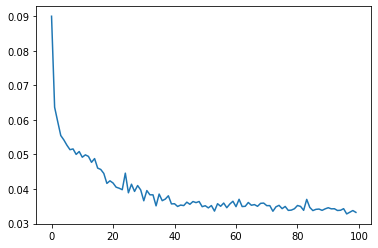

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
model.predict(scaled_train[-1:]),scaled_test[0][0]

1/1 [==============================] - 2s 2s/step


(array([[[0.37871203]]], dtype=float32), 0.35288135415060784)

In [ ]:
predictions = []

first_batch = scaled_train[-time_steps:]
current_batch = first_batch.reshape((1,time_steps,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0][0]
    predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 19ms/step


In [ ]:
predictions

[array([0.35374767], dtype=float32),
 array([0.35388184], dtype=float32),
 array([0.35645396], dtype=float32),
 array([0.378712], dtype=float32),
 array([0.38041186], dtype=float32),
 array([0.38039142], dtype=float32),
 array([0.37999827], dtype=float32),
 array([0.3765022], dtype=float32),
 array([0.37623078], dtype=float32),
 array([0.376234], dtype=float32),
 array([0.37629682], dtype=float32),
 array([0.37685448], dtype=float32),
 array([0.3768977], dtype=float32),
 array([0.3768972], dtype=float32),
 array([0.37688717], dtype=float32),
 array([0.37679836], dtype=float32),
 array([0.37679148], dtype=float32),
 array([0.37679154], dtype=float32),
 array([0.37679315], dtype=float32),
 array([0.3768073], dtype=float32),
 array([0.37680838], dtype=float32)]

In [ ]:
predictions = np.array([p[0] for p in predictions])

In [ ]:
unscaled_predictions = scaler.inverse_transform(predictions)
unscaled_predictions

ValueError: Expected 2D array, got 1D array instead:
array=[0.35374767 0.35388184 0.35645396 0.378712   0.38041186 0.38039142
 0.37999827 0.3765022  0.37623078 0.376234   0.37629682 0.37685448
 0.3768977  0.3768972  0.37688717 0.37679836 0.37679148 0.37679154
 0.37679315 0.3768073  0.37680838].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
test['predictions'] = unscaled_predictions

/var/folders/4g/2b3wfgg125s4z9sg913448zm0000gn/T/ipykernel_57185/330631504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = unscaled_predictions


<AxesSubplot:xlabel='date'>

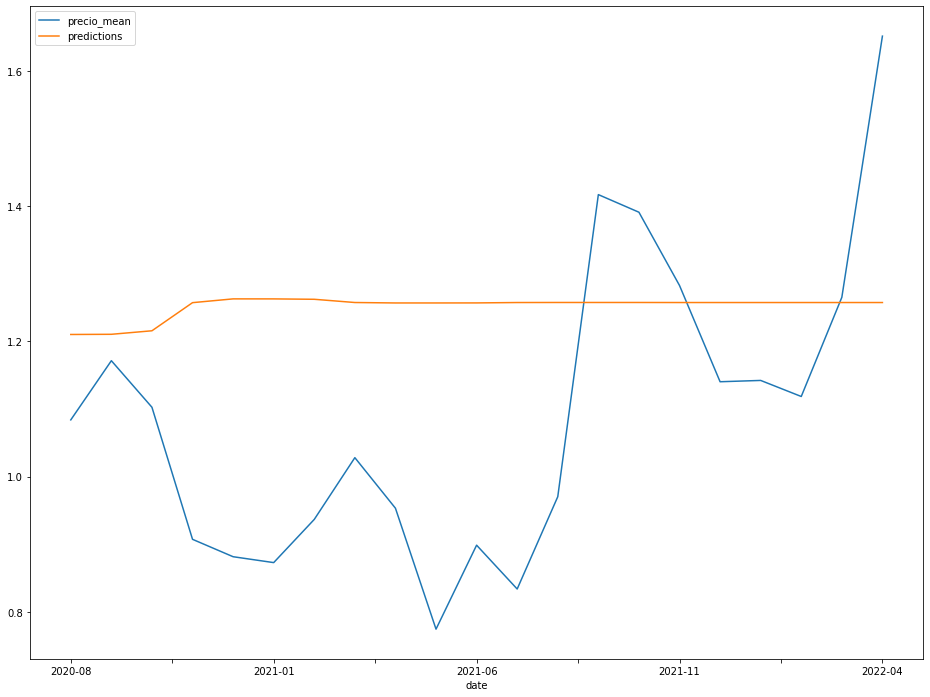

In [ ]:
test.plot(figsize=(16,12))

In [ ]:
mape_error = mean_absolute_percentage_error(test['precio_mean'], test['predictions'])*100
mape_error

16.49312015684278